## Import Libraries

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Summary of Notes/ To Dos:
- remove outliers, based on sessions
- fill nulls for pitch? or just drop?
- add headline length column
- drop lower count bureaus:
    - the-business
    - research
    - the ascent   
- publish date and time seem to influence sessions
- filter to just article type = article and drop this as a feature? or include other article types?
- what to do with tags, where there is very few samples of a tag? weighting?
- handling headline and promo text- should I encode those first and then use them as features? or cluster them? or use bag of works? something to discuss with Jacob and Ben. 

# Load in Data Set

In [9]:
articles = pd.read_csv('../data/raw/articles.csv', parse_dates=True)

### Inspect Data Set

In [10]:
articles.head(10)

,HEADLINE,PUBLISH_DATE,PUBLISHTIMEINSECONDS,WEEKDAY,HOLIDAY,BUREAU,AUTHOR,ARTICLE_TYPE,COLLECTION,TICKERS,...,DUO,CHARTICLE,NON_PAID_VIDEO,CUM_SESSIONS_SOFAR,SES,SE_VALUE,COST,TOTAL_VALUE,MARGIN,PROFITABLE
0,2 under-the-radar tech stocks to buy in 2022,2022-04-12,22740,Weekday,No,technology-and-telecom,anders bylund,article,investing,VG:EVBG:^IXIC:^GSPC:ERIC:EGHT,...,0,1,0,207,0.0,0.0,140.0,3.23,-138.99,0
1,does it matter that gamestop's split will be a...,2022-04-12,32400,Weekday,No,consumer-goods,rich duprey,article,investing,TSLA:GME,...,0,0,0,5811,0.0,0.0,140.0,64.92,-163.33,0
2,is amazon stock a buy this month?,2022-04-12,38220,Weekday,No,consumer-goods,chris neiger,article,investing,AMZN:GOOGL:MSFT:FB,...,0,0,0,1637,0.0,0.0,140.0,19.38,-184.55,0
3,2 stocks that cut you a check each month,2022-04-12,33420,Weekday,No,industrials,james brumley,article,investing,AMZN:STAG:FDX:TPX:GLAD,...,0,0,0,2037,0.0,0.0,140.0,27.67,-161.90,0
4,is amazon or alphabet the better stock split i...,2022-04-12,62220,Weekday,No,technology-and-telecom,robert izquierdo,article,investing,GOOGL:RIVN:AMZN:GOOG,...,0,0,0,7682,0.0,0.0,140.0,152.85,-46.99,0
5,3 stocks you’ll be glad you bought at these pr...,2022-04-12,24300,Weekday,No,technology-and-telecom,keithen drury,article,investing,TWLO:U:NET,...,0,0,0,1432,0.0,0.0,140.0,24.99,-176.41,0
6,"albertsons companies, inc. (aci) q4 2021 earni...",2022-04-12,52200,Weekday,No,other,motley fool transcribing,transcript,investing,ACI,...,0,0,0,229,0.0,0.0,70.0,3.33,-73.89,0
7,is it too late to buy occidental petroleum sto...,2022-04-12,32580,Weekday,No,energy-materials-and-utilities,jake lerch,article,investing,OXY,...,0,1,0,1428,0.0,0.0,140.0,15.31,-172.49,0
8,"if you invested $1,000 in shopify in 2016, thi...",2022-04-12,29400,Weekday,No,technology-and-telecom,parkev tatevosian,article,investing,SHOP,...,0,1,0,710,0.0,0.0,140.0,6.84,-151.57,0
9,2 top dividend stocks you can buy and hold for...,2022-04-12,27300,Weekday,No,industrials,bradley guichard,article,investing,LMT:RTX,...,0,0,0,7099,0.0,0.0,140.0,107.19,-54.90,0


In [11]:
# copy df 
articles_df = articles.copy()

In [12]:
# need to fix date col
articles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24945 entries, 0 to 24944
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HEADLINE              24945 non-null  object 
 1   PUBLISH_DATE          24945 non-null  object 
 2   PUBLISHTIMEINSECONDS  24945 non-null  int64  
 3   WEEKDAY               24945 non-null  object 
 4   HOLIDAY               24945 non-null  object 
 5   BUREAU                24945 non-null  object 
 6   AUTHOR                24945 non-null  object 
 7   ARTICLE_TYPE          24945 non-null  object 
 8   COLLECTION            24945 non-null  object 
 9   TICKERS               24945 non-null  object 
 10  PROMO                 24945 non-null  object 
 11  PITCH                 24929 non-null  object 
 12  DUO                   24945 non-null  int64  
 13  CHARTICLE             24945 non-null  int64  
 14  NON_PAID_VIDEO        24945 non-null  int64  
 15  CUM_SESSIONS_SOFAR 

In [13]:
# not too many nulls, cool 
pd.options.display.min_rows = 100
articles_df.isnull().sum()

HEADLINE                 0
PUBLISH_DATE             0
PUBLISHTIMEINSECONDS     0
WEEKDAY                  0
HOLIDAY                  0
BUREAU                   0
AUTHOR                   0
ARTICLE_TYPE             0
COLLECTION               0
TICKERS                  0
PROMO                    0
PITCH                   16
DUO                      0
CHARTICLE                0
NON_PAID_VIDEO           0
CUM_SESSIONS_SOFAR       0
SES                      0
SE_VALUE                 0
COST                     0
TOTAL_VALUE              0
MARGIN                   0
PROFITABLE               0
dtype: int64

In [14]:
articles_df.describe()

,PUBLISHTIMEINSECONDS,DUO,CHARTICLE,NON_PAID_VIDEO,CUM_SESSIONS_SOFAR,SES,SE_VALUE,COST,TOTAL_VALUE,MARGIN,PROFITABLE
count,24945.000000,24945.000000,24945.000000,24945.000000,2.494500e+04,24945.000000,24945.000000,24945.000000,24945.000000,24945.000000,24945.000000
mean,40478.263420,0.001002,0.007817,0.020846,8.092516e+03,1.814129,802.287319,137.876178,869.316352,684.781128,0.420405
std,17661.228768,0.031642,0.088070,0.142871,3.768641e+04,6.733012,2957.611246,148.489406,3103.604803,2906.503403,0.493634
min,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,1.000000,0.000000,-2517.390000,0.000000
25%,27000.000000,0.000000,0.000000,0.000000,5.720000e+02,0.000000,0.000000,70.000000,4.970000,-94.000000,0.000000
50%,37740.000000,0.000000,0.000000,0.000000,2.094000e+03,0.000000,1.000000,140.000000,30.000000,-44.000000,0.000000
75%,52260.000000,0.000000,0.000000,0.000000,6.651000e+03,1.040000,510.000000,160.000000,602.000000,436.000000,1.000000
max,86220.000000,1.000000,1.000000,1.000000,2.431051e+06,330.000000,148500.000000,6740.000000,150954.000000,144213.000000,1.000000


### Take care of some date things

In [15]:
# Fix Date columne
articles_df['PUBLISH_DATE'] = pd.to_datetime(articles_df['PUBLISH_DATE'])

In [16]:
articles_df['PUBLISH_DATE'].min()

Timestamp('2020-08-04 00:00:00')

In [17]:
articles_df['PUBLISH_DATE'].max()

Timestamp('2022-04-12 00:00:00')

In [7]:
# create day of week column
articles_df['DAY_OF_WEEK']= articles_df['PUBLISH_DATE'].dt.weekday

NameError: name 'articles_df' is not defined

In [40]:
# create month column
articles_df['PUBLISH_MONTH']= articles_df['PUBLISH_DATE'].dt.month 

### Look at outliers in target variable

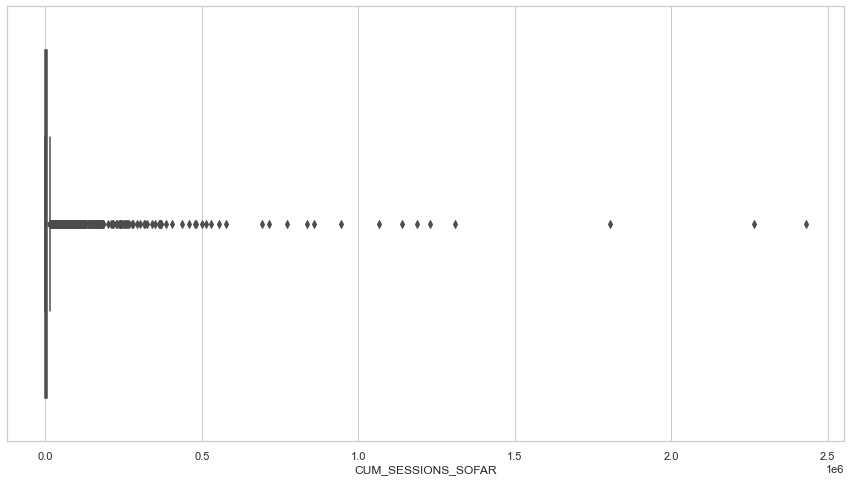

In [27]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=articles_df['CUM_SESSIONS_SOFAR'])

- lots of outliers here, but I don't want to remove all of them, since big hit articles can bring in a lot of SES..
- Maybe keep like 4x the iqr instead?

In [41]:
# set upper and lower bounds
upper = articles_df['CUM_SESSIONS_SOFAR'].mean() + 4*articles_df['CUM_SESSIONS_SOFAR'].std()
lower= articles_df['CUM_SESSIONS_SOFAR'].mean() - 4* articles_df['CUM_SESSIONS_SOFAR'].std()

In [42]:
articles_df= articles_df[(articles_df['CUM_SESSIONS_SOFAR'] < upper) & (articles_df['CUM_SESSIONS_SOFAR'] > lower)]

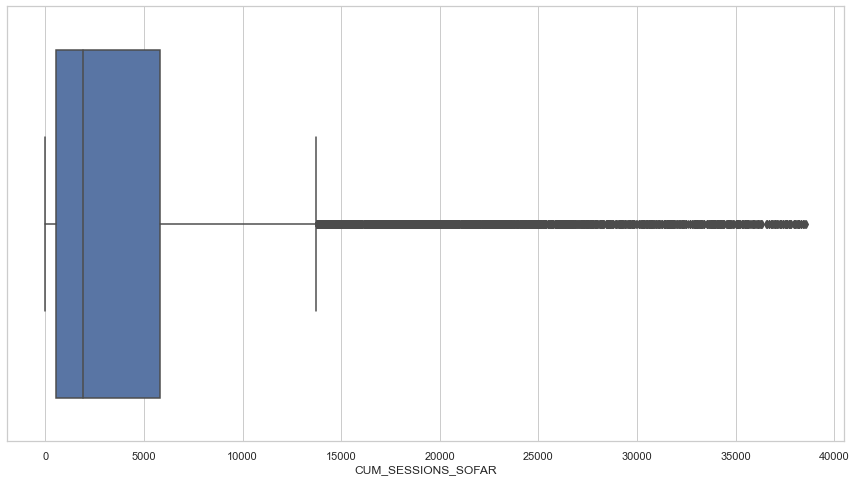

In [45]:
# check box plot again
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=articles_df['CUM_SESSIONS_SOFAR'])

- There are still alot of outliers, but since we're aiming to predict articles that get a lot of sessions, I think this is ok. 

## Explore each column

### Headline

In [35]:
articles_df.HEADLINE.value_counts()

3 stocks to avoid this week                                                                                               29
3 things to watch in the stock market this week                                                                           22
cathie wood goes bargain hunting: 3 stocks she just bought                                                                 8
these 3 value stocks are absurdly cheap right now                                                                          7
why airline shares are falling today                                                                                       6
3 dividend-paying tech stocks to buy right now                                                                             6
3 top e-commerce stocks to buy right now                                                                                   6
the best reason to take social security long before age 70                                                                 5


- will need to do some processing here- either clustering, bag of words, etc. something to turn these into vectors. 

In [47]:
# create a headline length feature
articles_df['HEADLINE_LEN'] = articles_df.HEADLINE.apply(len)

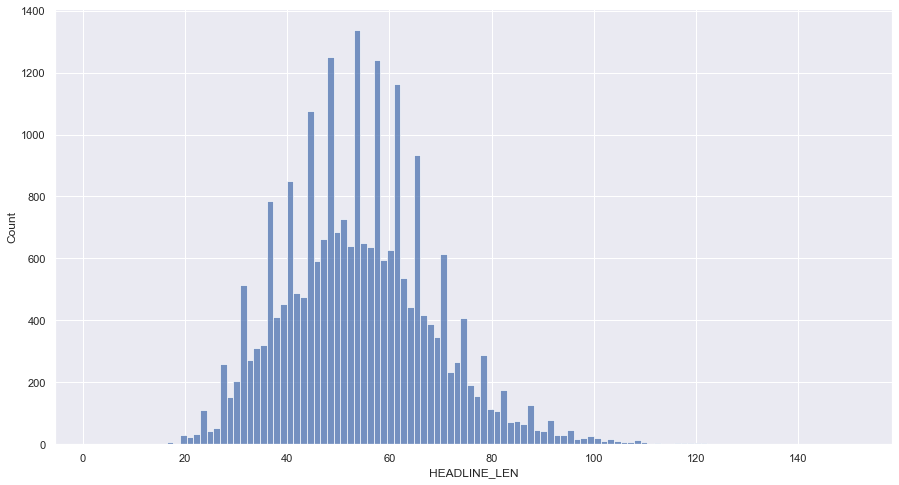

In [48]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.histplot(data = articles_df, x='HEADLINE_LEN');

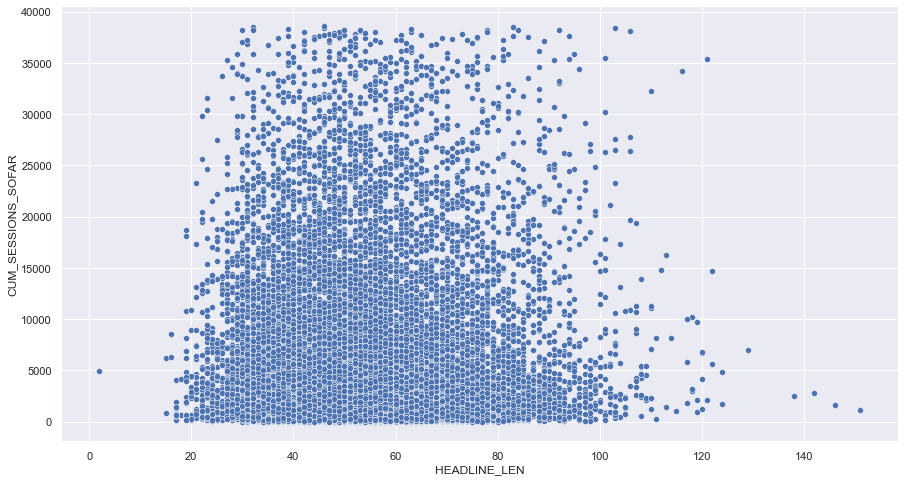

In [49]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.scatterplot(data = articles_df, x='HEADLINE_LEN', y='CUM_SESSIONS_SOFAR' );

- headline length doesn't have a huge correlation with sessions- except maybe headlines in the middle seem to do a bit better. 

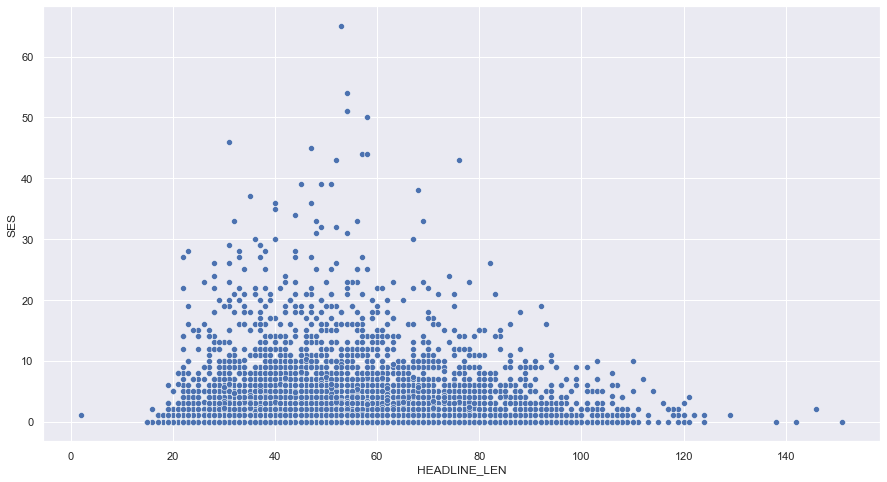

In [50]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.scatterplot(data = articles_df, x='HEADLINE_LEN', y='SES' );

- Similar relationship with SES- sort of like a normal curve- so longer thatn 20 char and shorter than 100 char roughly seem to do the best. 
- Also appear to be outliers here, so need to deal with that!

## Bureau

In [51]:
articles_df['BUREAU'].value_counts()

technology-and-telecom            5217
consumer-goods                    4424
health-care                       2844
industrials                       2276
financials                        1950
investment-planning               1866
other                             1513
energy-materials-and-utilities    1483
cryptocurrency                     702
markets                            569
real estate                        523
marijuana                          301
unknown bureau                     241
cannabis                           197
the-business                         1
research                             1
the ascent                           1
Name: BUREAU, dtype: int64

In [58]:
articles_df.groupby(['BUREAU'])['CUM_SESSIONS_SOFAR'].mean()`

BUREAU
cannabis                           4848.573604
consumer-goods                     3716.609629
cryptocurrency                     5789.907407
energy-materials-and-utilities     4825.534053
financials                         3102.546667
health-care                        5891.793601
industrials                        5327.606766
investment-planning                7445.456592
marijuana                          8818.166113
markets                            4615.917399
other                               756.930601
real estate                        3211.009560
research                           2114.000000
technology-and-telecom             5569.464060
the ascent                        14193.000000
the-business                       9042.000000
unknown bureau                      152.369295
Name: CUM_SESSIONS_SOFAR, dtype: float64

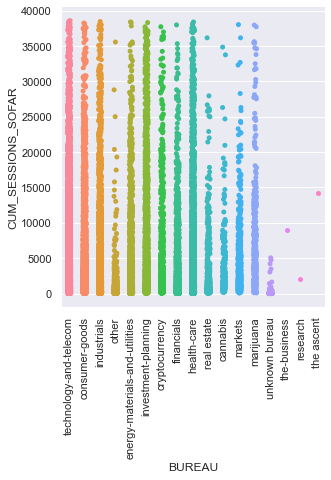

In [87]:
sns.set(rc = {'figure.figsize':(15,40)})
ax = sns.catplot(x="BUREAU", y="CUM_SESSIONS_SOFAR", data=articles_df);
ax.set_xticklabels(rotation = 90)


- might want to drop some of the lower count bureaus

In [33]:
## Create list of bureaus for google trends
unique_bureaus = articles_df['BUREAU'].unique()
unique_bureaus

array(['technology-and-telecom', 'consumer-goods', 'industrials', 'other',
       'energy-materials-and-utilities', 'investment-planning',
       'real estate', 'cryptocurrency', 'financials', 'health-care',
       'cannabis', 'markets', 'marijuana', 'unknown bureau',
       'the-business', 'research', 'the ascent'], dtype=object)

In [38]:
# drop bureaus we don't care about 
drop_these = ['the ascent', 'the-business', 'research', 'unknown bureau', 'other']

unique_bureaus = np.delete(unique_bureaus, np.where(np.isin(unique_bureaus, drop_these)))


In [39]:
unique_bureaus


array(['technology-and-telecom', 'consumer-goods', 'industrials',
       'energy-materials-and-utilities', 'investment-planning',
       'real estate', 'cryptocurrency', 'financials', 'health-care',
       'cannabis', 'markets', 'marijuana'], dtype=object)

In [40]:
#save to file in processed folder
unique_bureaus.tofile('../data/interim/unique_bureaus.csv', sep = ',')

In [57]:
articles_df.columns

Index(['HEADLINE', 'PUBLISH_DATE', 'PUBLISHTIMEINSECONDS', 'WEEKDAY',
       'HOLIDAY', 'BUREAU', 'AUTHOR', 'ARTICLE_TYPE', 'COLLECTION', 'TICKERS',
       'PROMO', 'PITCH', 'DUO', 'CHARTICLE', 'NON_PAID_VIDEO',
       'CUM_SESSIONS_SOFAR', 'SES', 'SE_VALUE', 'COST', 'TOTAL_VALUE',
       'MARGIN', 'PROFITABLE', 'DAY_OF_WEEK', 'HEADLINE_LEN', 'PUBLISH_MONTH'],
      dtype='object')

### Article Type

In [89]:
articles_df['ARTICLE_TYPE'].value_counts()

article                 12185
transcript               4463
10% promise series       4202
news brief               1428
video                    1355
slideshow                 241
roundtable                233
news                        1
unknown article type        1
Name: ARTICLE_TYPE, dtype: int64

- drop news and unknnown
- might be over representation of articles- should we just focis on those and drop the other kinds?

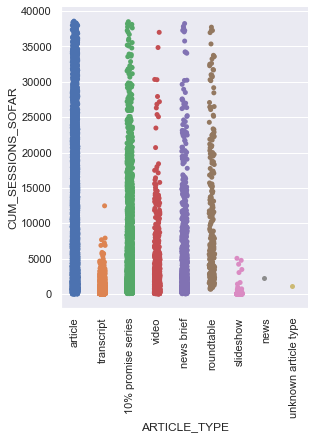

In [90]:
sns.set(rc = {'figure.figsize':(15,40)})
ax = sns.catplot(x="ARTICLE_TYPE", y="CUM_SESSIONS_SOFAR", data=articles_df);
ax.set_xticklabels(rotation = 90)

- concentration is within articles, but other types do sometimes end up with higher session counts

### Collection

In [93]:
articles_df['COLLECTION'].value_counts()

investing                   23014
retirement                    556
other                         444
pf/cards/taxes/mortgages       61
taxes                          23
personal-finance                8
careers                         3
Name: COLLECTION, dtype: int64

- def some low representation in other collections, maybe just limit to investing collections?
- probably not a good feature

## Tags

In [94]:
articles_df['DUO'].value_counts()

0    24084
1       25
Name: DUO, dtype: int64

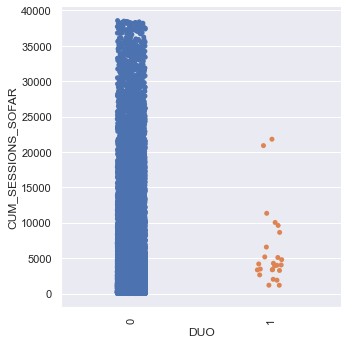

In [98]:
sns.set(rc = {'figure.figsize':(15,40)})
ax = sns.catplot(x="DUO", y="CUM_SESSIONS_SOFAR", data=articles_df);
ax.set_xticklabels(rotation = 90)

In [96]:
articles_df['CHARTICLE'].value_counts()

0    23915
1      194
Name: CHARTICLE, dtype: int64

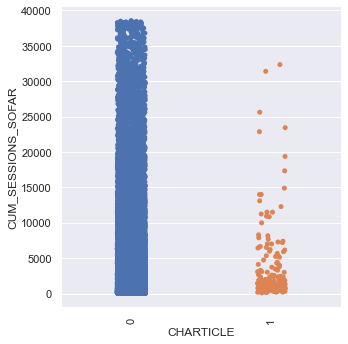

In [99]:
sns.set(rc = {'figure.figsize':(15,40)})
ax = sns.catplot(x="CHARTICLE", y="CUM_SESSIONS_SOFAR", data=articles_df);
ax.set_xticklabels(rotation = 90)

- Not a lot of charticle representation, but does have some high-session counts

In [97]:
articles_df['NON_PAID_VIDEO'].value_counts()

0    23590
1      519
Name: NON_PAID_VIDEO, dtype: int64

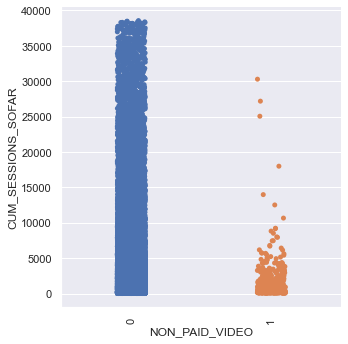

In [101]:
sns.set(rc = {'figure.figsize':(15,40)})
ax = sns.catplot(x="NON_PAID_VIDEO", y="CUM_SESSIONS_SOFAR", data=articles_df);
ax.set_xticklabels(rotation = 90)

- Again, low representation, but could be a decent variable

## Tickers

In [102]:
articles_df['TICKERS'].value_counts()

Unknown                                                               2119
TSLA                                                                   119
AMZN                                                                   112
AAPL                                                                   100
PTON                                                                    90
NFLX                                                                    90
DIS                                                                     78
NVDA                                                                    75
AMC                                                                     62
SPCE                                                                    62
MRNA                                                                    61
DKNG                                                                    56
FB                                                                      55
ROKU                     

In [104]:
articles_df['TICKERS'].nunique()

12935

- 12935 distinct tickers. Yikes!
- how to handle these? probably just focus on first listed ticker for now- usually it's the most important.
- but to OHE here would create a very wide data set- is that ok?

In [113]:
# create a first ticker column
# Series.str.split(pat=None, n=- 1, expand=False, *, regex=None)
articles_df['PRIMARY_TICKER'] = articles_df['TICKERS'].str.split(pat=':', expand=True)[0]

In [116]:
articles_df[['TICKERS', 'PRIMARY_TICKER']].head()

,TICKERS,PRIMARY_TICKER
0,VG:EVBG:^IXIC:^GSPC:ERIC:EGHT,VG
1,TSLA:GME,TSLA
2,AMZN:GOOGL:MSFT:FB,AMZN
3,AMZN:STAG:FDX:TPX:GLAD,AMZN
4,GOOGL:RIVN:AMZN:GOOG,GOOGL


In [117]:
articles_df['PRIMARY_TICKER'].nunique()

3548

- when looking at primary ticker, drops to 3548, which is helpful!

In [128]:
## Save ticker list to a csv, which we can use to pull Google Trends data
unique_tickers = articles_df['PRIMARY_TICKER'].unique()

#save to file in processed folder
unique_tickers.tofile('../data/interim/unique_tickers.csv', sep = ',')

In [127]:
unique_tickers

array(['VG', 'TSLA', 'AMZN', ..., 'MNMD', 'SPSC', 'DDL'], dtype=object)

### Author

In [130]:
articles_df['AUTHOR'].nunique()

323

- thinking about how this model may be used, I think author is probably not a good variable, although it may affect sessions, since some authors are more popular than others. However, the authors must all contribute content and pitch headlines and ideas, so this really isn't a viable feature to predict session volume

### Promo

In [135]:
articles_df['PROMO'].head()

0    These two companies an enjoying explosive top-...
1       Just how different is it from a cash dividend?
2    There are strong reasons to invest in Amazon r...
3    For some investors, dividend income that flows...
4    Both companies dominate much of our digital li...
Name: PROMO, dtype: object

- The promo is at the top of the article, and does appear on SERPs in Google, which could affect volume... this might be a strong feature but the text would need some encoding, similar to headline. Need help from profs on this one. 

## Time Features

### Publish Date

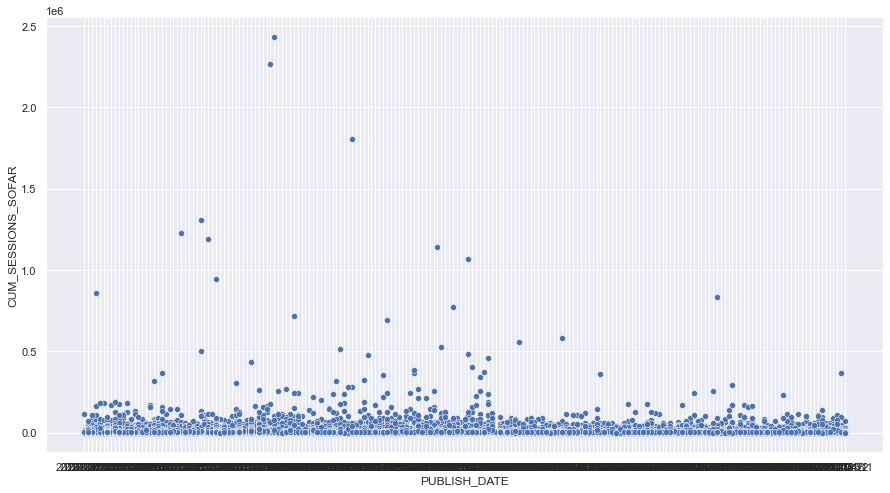

In [10]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.scatterplot(data = articles_df, x='PUBLISH_DATE', y='CUM_SESSIONS_SOFAR' );

<AxesSubplot:xlabel='PUBLISH_DATE', ylabel='Count'>

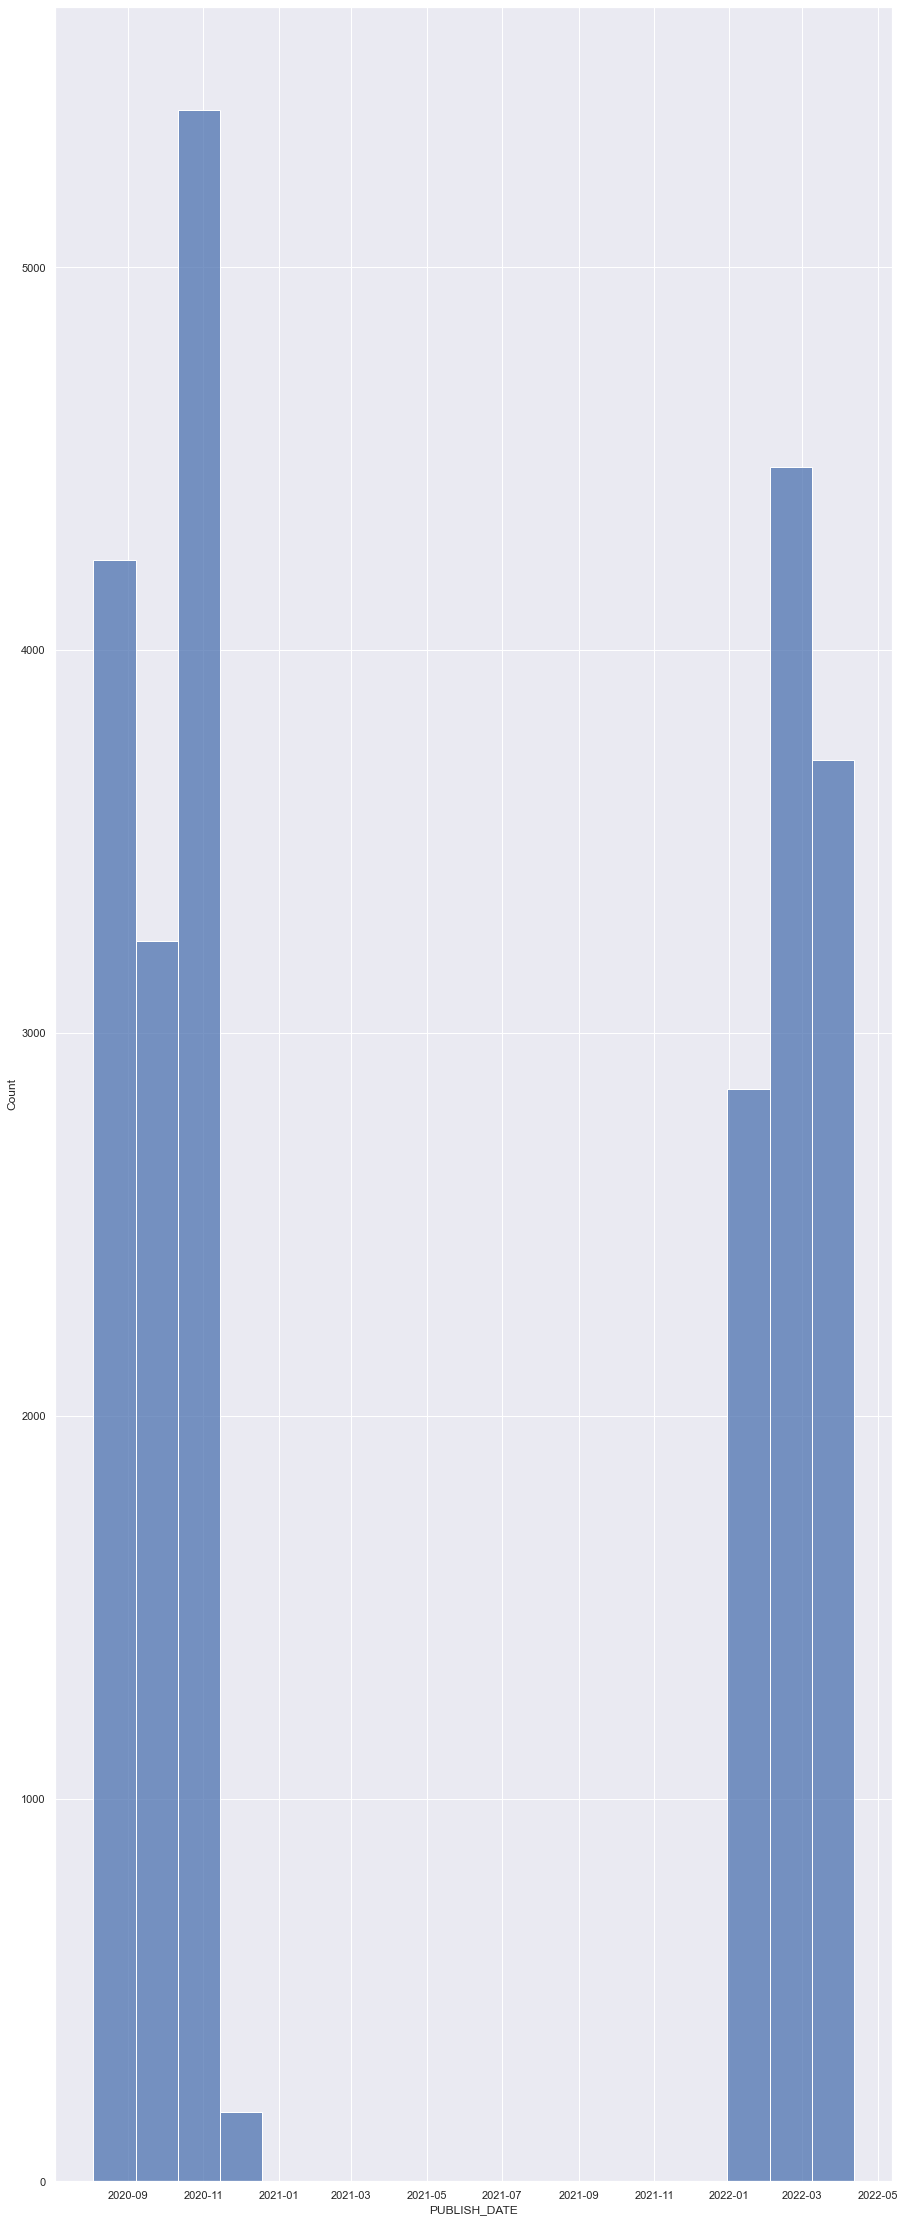

In [138]:
sns.histplot(data=articles_df, x="PUBLISH_DATE")

In [136]:
articles_df['PUBLISH_DATE'].min()

Timestamp('2020-08-04 00:00:00')

In [137]:
articles_df['PUBLISH_DATE'].max()

Timestamp('2022-04-12 00:00:00')

### Publish Time (In Seconds)

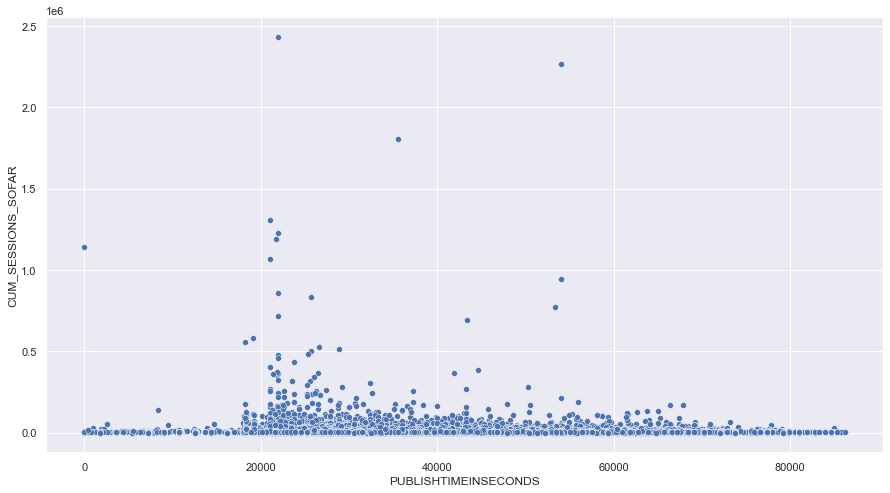

In [11]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.scatterplot(data = articles_df, x='PUBLISHTIMEINSECONDS', y='CUM_SESSIONS_SOFAR' );

- publish time seems to have an influence here-stuff published in the middle does slightly better

### Day of Week

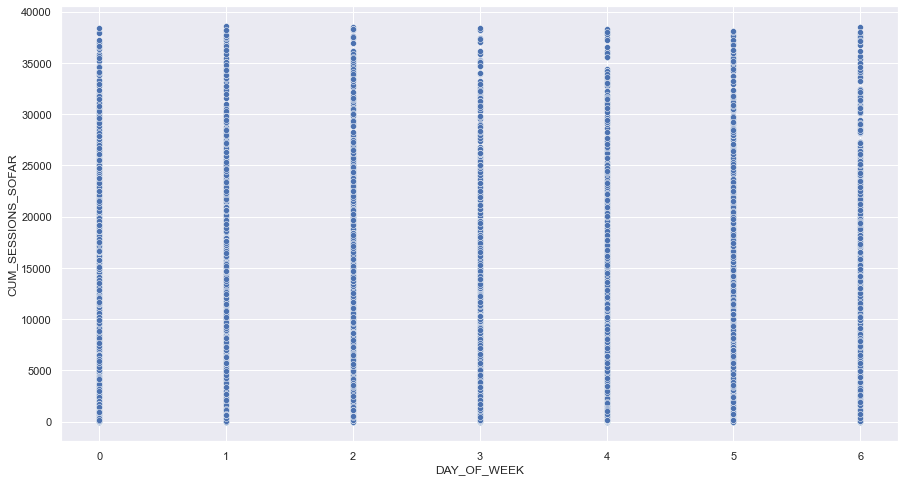

In [52]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.scatterplot(data = articles_df, x='DAY_OF_WEEK', y='CUM_SESSIONS_SOFAR' );

- Not seeing huge day of week correlations

### Weekday

In [53]:
articles_df.groupby('WEEKDAY')['CUM_SESSIONS_SOFAR'].mean()

WEEKDAY
Weekday    4363.378727
Weekend    7083.051120
Name: CUM_SESSIONS_SOFAR, dtype: float64

- weekend articles seem to get more sessions, on average.

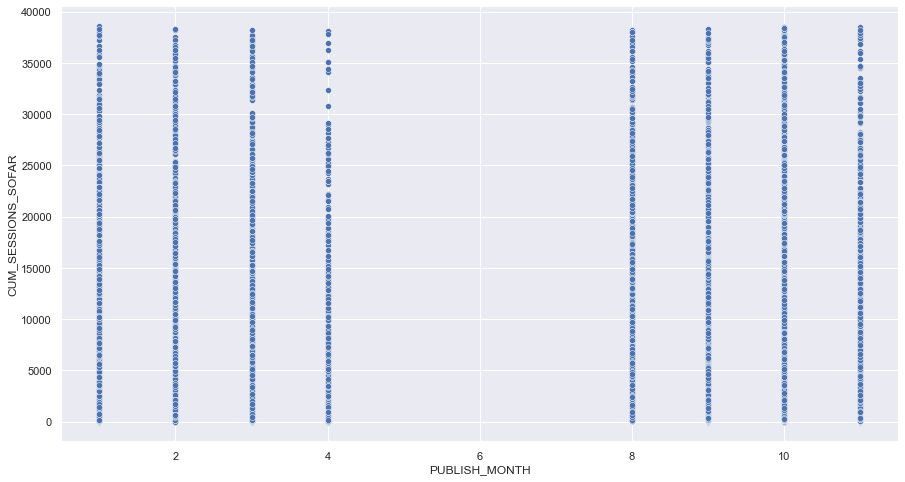

In [56]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.scatterplot(data = articles_df, x='PUBLISH_MONTH', y='CUM_SESSIONS_SOFAR' );

- missing some month data- due to backfill issue, hoping that's fixed this week. If not, might need to get creative